# Introducción al Aprendizaje Automatizado

## Trabajo Práctico Nro 4

## Inés Cipullo

### 2023

## Ejercicio A

Se definen y entrenan modelos K-Nearest-Neighbors, variando el valor de `k`, para resolver el problema de las espirales anidadas. Se utilizan dos datasets de espirales anidadas, una  versión "original" y otra que tiene agregadas dos variables que contienen ruido uniforme. Se grafican los errores de test, entrenamiento y validación para ambos modelos de knn según el valor de k. Además, se toma el modelo óptimo de knn para cada dataset y se grafica la predicción sobre el conjunto de test. También se grafican las predicciones sobre ambos datasets de un modelo de árboles de decisión y la clasificación correcta.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from copy import deepcopy
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


def train_knn_classif(ks, X_train, y_train, X_val, y_val, X_test, y_test, weights):
  train_errors = []
  val_errors = []
  test_errors = []
  best_val_error = 1

  for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights)

    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    y_test_pred = knn.predict(X_test)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    val_error = 1 - accuracy_score(y_val, y_val_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

    if val_error < best_val_error:
      best_val_error = val_error
      best_k = k
      best_knn = deepcopy(knn)

  return best_knn, best_k, train_errors, val_errors, test_errors


def plot_errors(ks, train_errors, val_errors, test_errors, title):
  plt.plot(ks, train_errors, label="Train Error")
  plt.plot(ks, test_errors, label="Test Error")
  plt.plot(ks, val_errors, label="Validation Error")
  plt.xlabel("Ks")
  plt.ylabel("Error")
  plt.title(title)
  plt.legend()
  plt.show()


def plot_prediction(df, title):
  colors = df["Class"].map({0: 'b', 1: 'r'})
  df.plot(x="X", y="Y", kind='scatter', c=colors)
  plt.title(title)
  plt.show()


def espirales_anidadas_sin_ruido():
  espirales_anidadas_data_url = 'https://github.com/inescipullo/IAA/raw/main/TP4/Datasets/c_0.data'
  espirales_anidadas_test_url = 'https://github.com/inescipullo/IAA/raw/main/TP4/Datasets/c_0.test'

  columns = ['X','Y','Class']
  data_columns = columns[:-1]
  target_columns = columns[-1]

  espirales_anidadas_data_df = pd.read_csv(espirales_anidadas_data_url, header=None, names=columns)
  espirales_anidadas_test_df = pd.read_csv(espirales_anidadas_test_url, header=None, names=columns)
  X_test, y_test = espirales_anidadas_test_df[data_columns], espirales_anidadas_test_df[target_columns]
  X, y = espirales_anidadas_data_df[data_columns], espirales_anidadas_data_df[target_columns]
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.8)

  ks = list(range(1,21))
  best_knn, best_k, train_errors, val_errors, test_errors = train_knn_classif(ks, X_train, y_train, X_val, y_val, X_test, y_test, "uniform")

  plot_errors(ks, train_errors, val_errors, test_errors, "Errors for Espirales Anidadas with KNN varying k.")

  y_test_pred = best_knn.predict(X_test)

  title = f"Prediction of Espirales Anidadas with KNN [k={best_k}]."
  test_df_with_prediction = pd.DataFrame({'X': X_test['X'], 'Y': X_test['Y'], 'Class':y_test_pred}, columns=columns)
  plot_prediction(test_df_with_prediction, title)

  plot_prediction(pd.DataFrame({'X': X_test['X'], 'Y': X_test['Y'], 'Class':y_test}), 'Actual test result of Espirales Anidadas')

  clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
  clf.fit(X_train, y_train)
  y_test_pred_tree = clf.predict(X_test)
  title2 = f"Prediction of Espirales Anidadas with Decision Trees."
  tree_test_df_with_prediction = pd.DataFrame({'X': X_test['X'], 'Y': X_test['Y'], 'Class':y_test_pred_tree}, columns=columns)
  plot_prediction(tree_test_df_with_prediction, title2)


def espirales_anidadas_con_ruido():
  espirales_anidadas_data_url = 'https://github.com/inescipullo/IAA/raw/main/TP4/Datasets/c_2.data'
  espirales_anidadas_test_url = 'https://github.com/inescipullo/IAA/raw/main/TP4/Datasets/c_2.test'

  columns = ['X','Y','Z','W','Class']
  data_columns = columns[:-1]
  target_columns = columns[-1]

  espirales_anidadas_data_df = pd.read_csv(espirales_anidadas_data_url, header=None, names=columns)
  espirales_anidadas_test_df = pd.read_csv(espirales_anidadas_test_url, header=None, names=columns)
  X_test, y_test = espirales_anidadas_test_df[data_columns], espirales_anidadas_test_df[target_columns]
  X, y = espirales_anidadas_data_df[data_columns], espirales_anidadas_data_df[target_columns]
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.8)

  ks = list(range(1,21))
  best_knn, best_k, train_errors, val_errors, test_errors = train_knn_classif(ks, X_train, y_train, X_val, y_val, X_test, y_test, "uniform")

  plot_errors(ks, train_errors, val_errors, test_errors, "Errors for Espirales Anidadas (with noise) with KNN varying k.")

  y_test_pred = best_knn.predict(X_test)

  plot_columns = ['X','Y','Class']
  title = f"Prediction of Espirales Anidadas (with noise) with KNN [k={best_k}]."
  test_df_with_prediction = pd.DataFrame({'X': X_test['X'], 'Y': X_test['Y'], 'Class':y_test_pred}, columns=plot_columns)
  plot_prediction(test_df_with_prediction, title)

  plot_prediction(pd.DataFrame({'X': X_test['X'], 'Y': X_test['Y'], 'Class':y_test}), 'Actual test result of Espirales Anidadas')

  clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
  clf.fit(X_train, y_train)
  y_test_pred_tree = clf.predict(X_test)
  title2 = f"Prediction of Espirales Anidadas (with noise) with Decision Trees."
  tree_test_df_with_prediction = pd.DataFrame({'X': X_test['X'], 'Y': X_test['Y'], 'Class':y_test_pred_tree}, columns=plot_columns)
  plot_prediction(tree_test_df_with_prediction, title2)


espirales_anidadas_sin_ruido()
espirales_anidadas_con_ruido()

### Resultados sin ruido

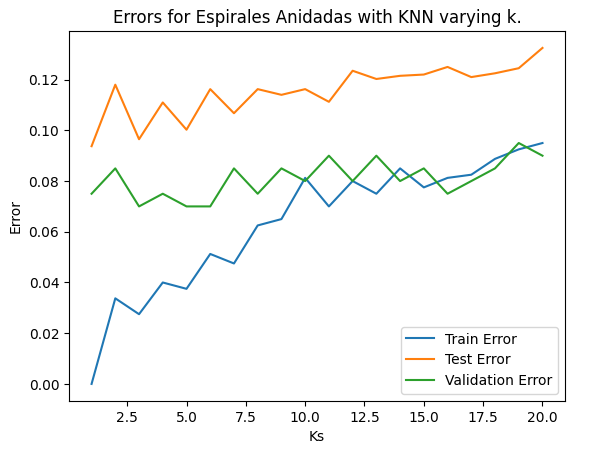

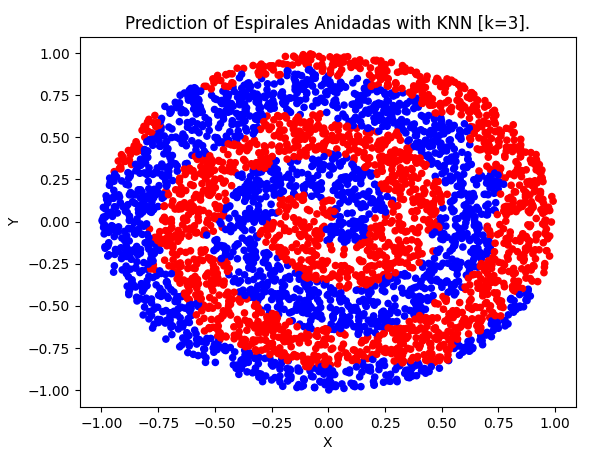

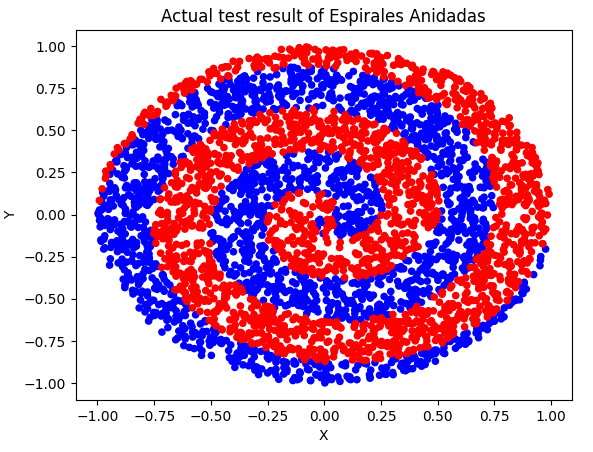

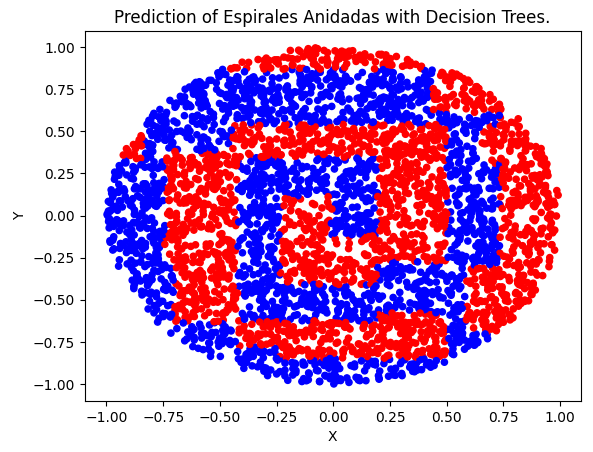

La predicción del clasififcador Nearest Neighbors con `k=3` de las espirales anidadas sin ruido es muy bueno, teniendo un error de test apenas por encima de 0.1. Estos errores de clasificación ocurren en los bordes de las espirales, justamente donde no _todos_ los vecinos son de la misma clase, pero el resto de puntos están bien clasificados. Comparandolo con la predicción de un árbol de decisión, parece mejor la predicción de KNN, ya que el árbol clasifica unicamente con lineas rectas paralelas a uno de los dos ejes, lo cual lleva a que la curvatura de las espirales se prediga con su mejor aproximación lineal, y de esa forma consigue mayor error de clasificación.

### Resultados con ruido

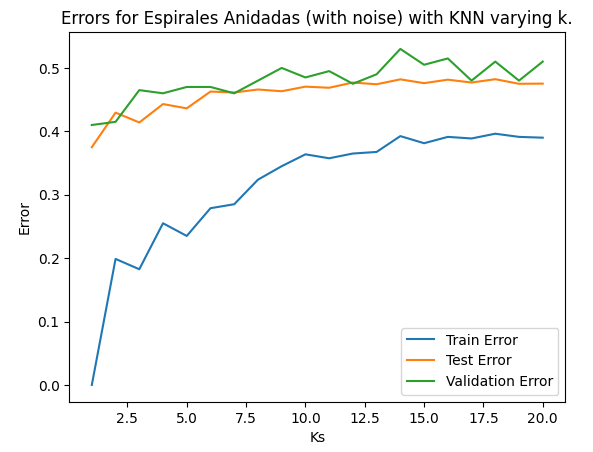

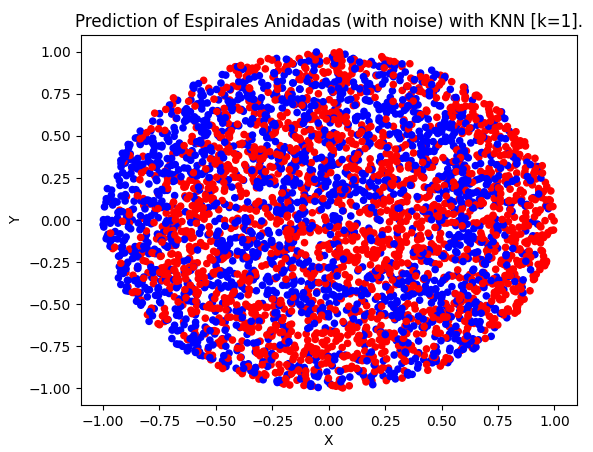

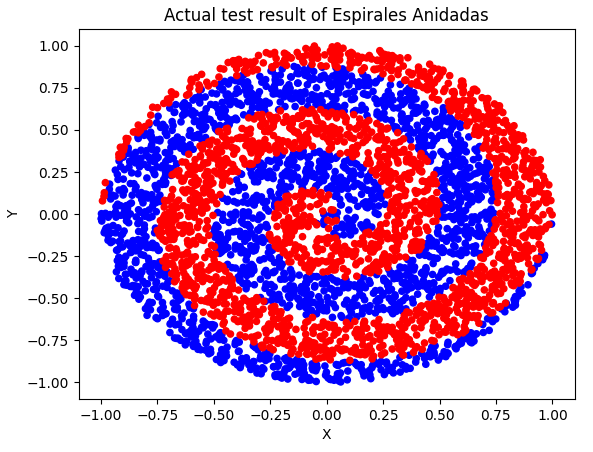

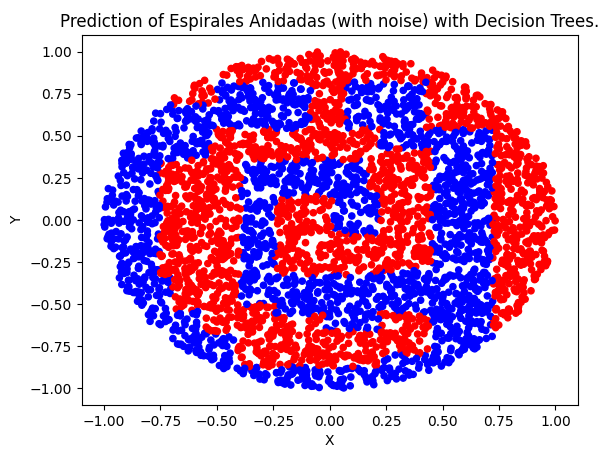

La predicción del clasififcador Nearest Neighbors con `k=3` de las espirales anidadas con ruido resulta todo lo contrario. Se parte con un error cerca de 0.4 y con ningún valor de `k` mejora. Si bien sobre cada espiral predominan puntos clasificados correctamente, hay una cantidad considerable de puntos mal clasificados al punto de que las espirales no se distinguen a simple vista. Podemos concluir que KNN no es un clasificador tan tolerante al ruido, y esto es principalmente porque considera todas las features al calcular distancias.
La predicción del árbol de decisión, por el contrario, es bastante similar a la obtenida con el conjunto sin ruido, por eso se podría decir que es un modelo mucho más tolerante al ruido.

## Ejercicio B

### Código Auxiliar

In [45]:
import numpy as np
import pandas as pd


class MultidimensionalGaussianDistribution:
	def generate_sample_a(self, n: int, dimension: int, C: float):
		center_0 = np.ones(dimension) * -1
		center_1 = np.ones(dimension)
		variance = (C * np.sqrt(dimension))**2

		sample_0 = self._sample_with_center_and_variance(n, dimension, center_0, variance, 0)
		sample_1 = self._sample_with_center_and_variance(n, dimension, center_1, variance, 1)
		columns = [f"Dim{i+1}" for i in range(dimension)]
		columns.append("Class")
		dataframe = pd.DataFrame(sample_0+sample_1, columns=columns)
		return dataframe

	def generate_sample_b(self, n: int, dimension: int, C: float):
		center_0 = np.append(np.ones(1), np.zeros(dimension-1))
		center_1 = np.append(np.ones(1)*-1, np.zeros(dimension-1))
		variance = C**2

		sample_0 = self._sample_with_center_and_variance(n, dimension, center_0, variance, 0)
		sample_1 = self._sample_with_center_and_variance(n, dimension, center_1, variance, 1)
		columns = [f"Dim{i+1}" for i in range(dimension)]
		columns.append("Class")
		dataframe = pd.DataFrame(sample_0+sample_1, columns=columns)
		return dataframe


	def _sample_with_center_and_variance(self, n: int, dimension: int, center, variance, category):
		covariance_matrix = np.identity(dimension) * variance
		sample = np.random.multivariate_normal(mean=center, cov=covariance_matrix, size=n//2)
		sample_with_class = [point + [category] for point in sample.tolist()]
		return sample_with_class

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


class DimensionalidadTree:
  def __init__(self):
    self.df_generator = MultidimensionalGaussianDistribution()
    self.test_sample_size = 10000
    self.test_errors = {}
    self.train_errors = {}

  def varying_dimension(self, sample_size: int, dimensions: list[int], C: float):
    """Ejercicio 4 - Dimensionalidad."""
    for d in dimensions:
      self.test_errors[f"{d}"] = {"a": [], "b": []}
      self.train_errors[f"{d}"] = {"a": [], "b": []}

      test_df_a = self.df_generator.generate_sample_a(n=self.test_sample_size, dimension=d, C=C)
      test_df_b = self.df_generator.generate_sample_b(n=self.test_sample_size, dimension=d, C=C)

      for i in range(20):
        df_a = self.df_generator.generate_sample_a(n=sample_size, dimension=d, C=C)
        df_b = self.df_generator.generate_sample_b(n=sample_size, dimension=d, C=C)
        self._train_and_test_tree_for_df(df_a, test_df_a, d, "a")
        self._train_and_test_tree_for_df(df_b, test_df_b, d, "b")

    self._plot_errors()

  def _train_and_test_tree_for_df(self, df, test_df, var, sample: str):
    data, target = self._get_data_and_target(df)
    test_data, test_target = self._get_data_and_target(test_df)

    trained_decision_tree = self._train_decision_tree(data, target)
    test_df_with_prediction = self._test_decision_tree(trained_decision_tree, test_df)
    train_df_with_prediction = self._test_decision_tree(trained_decision_tree, df)

    self.test_errors[f"{var}"][sample].append(1 - accuracy_score(test_target, test_df_with_prediction["Class"]))
    self.train_errors[f"{var}"][sample].append(1 - accuracy_score(target, train_df_with_prediction["Class"]))

  def _get_data_and_target(self, dataframe):
    data = dataframe[dataframe.columns[:-1]]
    target = dataframe["Class"].values.tolist()
    return data, target

  def _train_decision_tree(self, data, target):
    decision_tree = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.005, random_state=0, min_samples_leaf=5)
    return decision_tree.fit(data, target)

  def _test_decision_tree(self, decision_tree, test_df):
    test_data, _ = self._get_data_and_target(test_df)
    prediction = decision_tree.predict(test_data)
    test_data["Class"]=prediction
    return pd.DataFrame(test_data)

  def _plot_errors(self):
    x = []
    y_a_test = []
    y_b_test = []
    y_a_train = []
    y_b_train = []
    for n in self.test_errors.keys():
      x.append(int(n))
      y_a_test.append(np.mean(self.test_errors[n]["a"]))
      y_b_test.append(np.mean(self.test_errors[n]["b"]))
      y_a_train.append(np.mean(self.train_errors[n]["a"]))
      y_b_train.append(np.mean(self.train_errors[n]["b"]))

    plt.plot(x, y_a_test, linestyle='dashed', marker='s', label="Tree - Test error - Sample A")
    plt.plot(x, y_b_test, linestyle='dashed', marker='s', label="Tree - Test error - Sample B")
    plt.plot(x, y_a_train, linestyle='dashed', marker='s', label="Tree - Train error - Sample A")
    plt.plot(x, y_b_train, linestyle='dashed', marker='s', label="Tree - Train error - Sample B")

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from copy import deepcopy
import sklearn as sk
from sklearn.base import is_classifier
import matplotlib.pyplot as plt


def error(y_true, y_pred, is_classif: bool):
  if is_classif:
    return sk.metrics.zero_one_loss(y_true=y_true, y_pred=y_pred)
  return sk.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)


def train_network(network, epochs, X_train, y_train, X_val, y_val, X_test, y_test):
  best_network = deepcopy(network)
  train_errors = []
  val_errors = []
  test_errors = []
  best_val_error = 1
  for i in range(epochs):
    network = network.fit(X_train, y_train)

    y_train_pred = network.predict(X_train)
    y_test_pred = network.predict(X_test)
    y_val_pred = network.predict(X_val)

    is_classif = is_classifier(network)
    train_error = error(y_train, y_train_pred, is_classif)
    test_error = error(y_test, y_test_pred, is_classif)
    val_error = error(y_val, y_val_pred, is_classif)

    train_errors.append(train_error)
    test_errors.append(test_error)
    val_errors.append(val_error)

    if val_error < best_val_error:
      best_network = deepcopy(network)
      best_val_error = val_error

  return best_network, train_errors, val_errors, test_errors


def plot_dimensionalidad_network(errors):
  x = [2,4,8,16,32]
  y_test_a = []
  y_test_b = []
  y_train_a = []
  y_train_b = []
  for d in errors.keys():
    y_test_a.append(np.mean(errors[f"{d}"]["a_test"]))
    y_test_b.append(np.mean(errors[f"{d}"]["b_test"]))
    y_train_a.append(np.mean(errors[f"{d}"]["a_train"]))
    y_train_b.append(np.mean(errors[f"{d}"]["b_train"]))

  plt.plot(x, y_test_a, marker='s', label="Network - Test error - Sample A")
  plt.plot(x, y_test_b, marker='s', label="Network - Test error - Sample B")
  plt.plot(x, y_train_a, marker='s', label="Network - Train error - Sample A")
  plt.plot(x, y_train_b, marker='s', label="Network - Train error - Sample B")

def dimensionalidad_network():
  C = 0.78
  n = 250
  n_test = 10000
  dimensions = [2,4,8,16,32]
  df_generator = MultidimensionalGaussianDistribution()
  errors = {}
  for d in dimensions:
    errors[f"{d}"] = {"a_test": [], "b_test": [], "a_train": [], "b_train": []}
    data_columns = [f'Dim{i+1}' for i in range(d)]
    target_columns = "Class"

    test_df_a = df_generator.generate_sample_a(n=n_test, dimension=d, C=C)
    X_test_a, y_test_a = test_df_a[data_columns], test_df_a[target_columns]
    test_df_b = df_generator.generate_sample_b(n=n_test, dimension=d, C=C)
    X_test_b, y_test_b = test_df_b[data_columns], test_df_b[target_columns]

    for i in range(20):
      df_a = df_generator.generate_sample_a(n=n, dimension=d, C=C)
      X_a, y_a = df_a[data_columns], df_a[target_columns]
      df_b = df_generator.generate_sample_b(n=n, dimension=d, C=C)
      X_b, y_b = df_b[data_columns], df_b[target_columns]

      X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(X_a, y_a, random_state=0, train_size=0.8)
      X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_b, y_b, random_state=0, train_size=0.8)

      clasif_a = MLPClassifier(
        hidden_layer_sizes=(6,),
        activation='logistic',
        solver='sgd',
        alpha=0.0,
        batch_size=1,
        learning_rate='constant',
        learning_rate_init=0.1,
        momentum=0.3,
        nesterovs_momentum=False,
        tol=0.0,
        warm_start=True,
        max_iter=20
      )
      clasif_b = deepcopy(clasif_a)

      best_network_a, _, _, _ = train_network(clasif_a, 200, X_train_a, y_train_a, X_val_a, y_val_a, X_test_a, y_test_a)
      best_network_b, _, _, _ = train_network(clasif_b, 200, X_train_b, y_train_b, X_val_b, y_val_b, X_test_b, y_test_b)

      y_test_a_pred = best_network_a.predict(X_test_a)
      y_test_b_pred = best_network_b.predict(X_test_b)
      y_train_a_pred = best_network_a.predict(X_train_a)
      y_train_b_pred = best_network_b.predict(X_train_b)

      test_error_a = error(y_test_a, y_test_a_pred, True)
      test_error_b = error(y_test_b, y_test_b_pred, True)
      train_error_a = error(y_train_a, y_train_a_pred, True)
      train_error_b = error(y_train_b, y_train_b_pred, True)
      errors[f"{d}"]["a_test"].append(test_error_a)
      errors[f"{d}"]["b_test"].append(test_error_b)
      errors[f"{d}"]["a_train"].append(train_error_a)
      errors[f"{d}"]["b_train"].append(train_error_b)

  plot_dimensionalidad_network(errors)

In [48]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


def plot_dimensionalidad_naivebayes(errors):
  x = [2,4,8,16,32]
  y_test_a = []
  y_test_b = []
  y_train_a = []
  y_train_b = []
  for d in errors.keys():
    y_test_a.append(np.mean(errors[f"{d}"]["a_test"]))
    y_test_b.append(np.mean(errors[f"{d}"]["b_test"]))
    y_train_a.append(np.mean(errors[f"{d}"]["a_train"]))
    y_train_b.append(np.mean(errors[f"{d}"]["b_train"]))

  plt.plot(x, y_test_a, marker='s', label="Naive Bayes - Test error - Sample A")
  plt.plot(x, y_test_b, marker='s', label="Naive Bayes - Test error - Sample B")
  plt.plot(x, y_train_a, marker='s', label="Naive Bayes - Train error - Sample A")
  plt.plot(x, y_train_b, marker='s', label="Naive Bayes - Train error - Sample B")


def dimensionalidad_naivebayes():
  C = 0.78
  n = 250
  n_test = 10000
  dimensions = [2,4,8,16,32]
  df_generator = MultidimensionalGaussianDistribution()
  errors = {}
  for d in dimensions:
    errors[f"{d}"] = {"a_test": [], "b_test": [], "a_train": [], "b_train": []}
    data_columns = [f'Dim{i+1}' for i in range(d)]
    target_columns = "Class"

    test_df_a = df_generator.generate_sample_a(n=n_test, dimension=d, C=C)
    X_test_a, y_test_a = test_df_a[data_columns], test_df_a[target_columns]
    test_df_b = df_generator.generate_sample_b(n=n_test, dimension=d, C=C)
    X_test_b, y_test_b = test_df_b[data_columns], test_df_b[target_columns]

    for i in range(20):
      df_a = df_generator.generate_sample_a(n=n, dimension=d, C=C)
      X_train_a, y_train_a = df_a[data_columns], df_a[target_columns]
      df_b = df_generator.generate_sample_b(n=n, dimension=d, C=C)
      X_train_b, y_train_b = df_b[data_columns], df_b[target_columns]

      clf_a = GaussianNB()
      clf_b = GaussianNB()

      clf_a.fit(X_train_a, y_train_a)
      clf_b.fit(X_train_b, y_train_b)

      y_test_a_pred = clf_a.predict(X_test_a)
      y_test_b_pred = clf_b.predict(X_test_b)
      y_train_a_pred = clf_a.predict(X_train_a)
      y_train_b_pred = clf_b.predict(X_train_b)

      test_error_a = error(y_test_a, y_test_a_pred, True)
      test_error_b = error(y_test_b, y_test_b_pred, True)
      train_error_a = error(y_train_a, y_train_a_pred, True)
      train_error_b = error(y_train_b, y_train_b_pred, True)
      errors[f"{d}"]["a_test"].append(test_error_a)
      errors[f"{d}"]["b_test"].append(test_error_b)
      errors[f"{d}"]["a_train"].append(train_error_a)
      errors[f"{d}"]["b_train"].append(train_error_b)

  plot_dimensionalidad_naivebayes(errors)

In [51]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def plot_dimensionalidad_knn(errors, k, linestyle):
  x = [2,4,8,16,32]
  y_test_a = []
  y_test_b = []
  y_train_a = []
  y_train_b = []
  for d in x:
    y_test_a.append(np.mean(errors[f"{d}"]["a_test"]))
    y_test_b.append(np.mean(errors[f"{d}"]["b_test"]))
    y_train_a.append(np.mean(errors[f"{d}"]["a_train"]))
    y_train_b.append(np.mean(errors[f"{d}"]["b_train"]))

  plt.plot(x, y_test_a, linestyle=linestyle, marker='s', label=f"KNN [k={k}] - Test error - Sample A")
  plt.plot(x, y_test_b, linestyle=linestyle, marker='s', label=f"KNN [k={k}] - Test error - Sample B")
  plt.plot(x, y_train_a, linestyle=linestyle, marker='s', label=f"KNN [k={k}]- Train error - Sample A")
  plt.plot(x, y_train_b, linestyle=linestyle, marker='s', label=f"KNN [k={k}]- Train error - Sample B")


def dimensionalidad_knn(k, weights, linestyle='dashed'):
  C = 0.78
  n = 250
  n_test = 10000
  dimensions = [2,4,8,16,32]
  df_generator = MultidimensionalGaussianDistribution()
  errors = {}
  for d in dimensions:
    errors[f"{d}"] = {}
    errors[f"{d}"] = {"a_test": [], "b_test": [], "a_train": [], "b_train": []}
    data_columns = [f'Dim{i+1}' for i in range(d)]
    target_columns = "Class"

    test_df_a = df_generator.generate_sample_a(n=n_test, dimension=d, C=C)
    X_test_a, y_test_a = test_df_a[data_columns], test_df_a[target_columns]
    test_df_b = df_generator.generate_sample_b(n=n_test, dimension=d, C=C)
    X_test_b, y_test_b = test_df_b[data_columns], test_df_b[target_columns]

    for i in range(20):
      df_a = df_generator.generate_sample_a(n=n, dimension=d, C=C)
      X_train_a, y_train_a = df_a[data_columns], df_a[target_columns]
      df_b = df_generator.generate_sample_b(n=n, dimension=d, C=C)
      X_train_b, y_train_b = df_b[data_columns], df_b[target_columns]

      clf_a = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf_b = KNeighborsClassifier(n_neighbors=k, weights=weights)

      clf_a.fit(X_train_a, y_train_a)
      clf_b.fit(X_train_b, y_train_b)

      y_test_a_pred = clf_a.predict(X_test_a)
      y_test_b_pred = clf_b.predict(X_test_b)
      y_train_a_pred = clf_a.predict(X_train_a)
      y_train_b_pred = clf_b.predict(X_train_b)

      test_error_a = 1 - accuracy_score(y_test_a, y_test_a_pred)
      test_error_b = 1 - accuracy_score(y_test_b, y_test_b_pred)
      train_error_a = 1 - accuracy_score(y_train_a, y_train_a_pred)
      train_error_b = 1 - accuracy_score(y_train_b, y_train_b_pred)
      errors[f"{d}"]["a_test"].append(test_error_a)
      errors[f"{d}"]["b_test"].append(test_error_b)
      errors[f"{d}"]["a_train"].append(train_error_a)
      errors[f"{d}"]["b_train"].append(train_error_b)

  plot_dimensionalidad_knn(errors, k, linestyle=linestyle)

### .
Se generan datasets de datos diagonales y paralelos con `C = 0.78`, `n = 250` para el conjunto de entrenamiento y `n = 10000` para el de test, variando el valor de `d` según la siguiente lista: `2, 4, 8, 16, 32`. Para cada valor de `d`, se crean 20 conjuntos distintos de entrenamiento, y uno solo de test.

Se entrenan árboles de decisión, redes neuronales, clasificadores Naive Bayes y clasificadores Nearest Neighbours, con `k=1` y con `k=3`, para resolver dicho problema, y se grafican los errores de test y entrenamiento.

Aclaración: el valor `k=3` lo obtuve entrenando clasificadores variando el k entre 1 y 10, y buscando el óptimo, previo a resolver el ejercicio. Cuando me di cuenta que la idea era usar un conjunto de validación integrado en el ejercicio ya era tarde para rehacerlo, más que nada porque no fui guardando los valores para plotear los errores de los otros modelos y redes neuronales tarde bastante en ejecutar.

In [ ]:
def dimensionalidad():
  DimensionalidadTree().varying_dimension(sample_size=250, dimensions=[2,4,8,16,32], C=0.78)
  dimensionalidad_network()
  dimensionalidad_naivebayes()
  dimensionalidad_knn(1, "uniform")
  dimensionalidad_knn(3, "uniform")
  plt.xlabel("Dimension")
  plt.ylabel("Error")
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
  plt.title("Dimensionalidad")
  plt.show()

dimensionalidad()

### Resultados

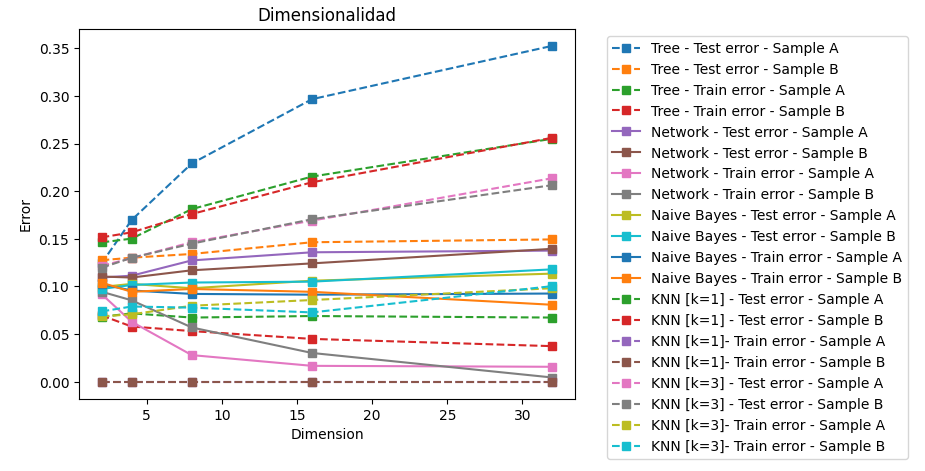

El modelo K Nearest Neighbors no arroja buenos resultados en la clasificación de los datos paralelos y diagonales, independientemente de la dimensión, siendo superado por Redes Neuronales y Naive Bayes, y Árboles de Decisión solo en el sample b. Más allá de los resultados comparandolo con otros modelos, vemos como ambos modelos KNN para ambos conjuntos de datos se ven bastante afectados por la dimensionalidad. Me inclino a pensar que esto es porque a medida que aumenta la dimensión y se va vaciando el espacio, la distancia entre los puntos aumenta y hay más probabilidad que los vecinos de un nodo no necesariamente correspondan a la misma clase que el nodo. También se observa que no hay practicamenete diferencia en las curvas de error entre los datos diagonales y paralelos, y esto es porque la ubicación de los puntos no influye en el calculo de la distancia.

Además, notamos como los modelos KNN con `k=1` tienen errores de entrenamiento nulos, se sobreajusta completamente independientemente de la dimensión.

## Ejercicio C

Para los Datasets Paralelo y Diagonal, se aplican clasificadores KNN con pesado inverso a la distancia.

Por un lado, se fija la dimensión de los datos en 32 y se varía el valor de k. Se grafican las curvas de error de entrenamiento, test y validación, buscando comparar, principalmenete, los resultados para `k=50` con el `k` óptimo.

Luego, variando el valor de la dimensión de los datos (entre 2, 4, 8, 16 y 32), se entrenan clasificadores con `k=50` y ambos `k` óptimos previamente obtenidos. Se grafican las curvas de error de entrenamiento, test y validación según la dimensión y se las compara con las obtenidas en el ejercicio B (clasificador KNN con peso uniforme).

Dataset Diagonal [d=32]
 - mejor modelo: KNN k=10
 - error test con k=10: 0.15369999999999995
 - error test con k=50: 0.12080000000000002
Dataset Paralelo [d=32]
 - mejor modelo: KNN k=17
 - error test con k=17: 0.14939999999999998
 - error test con k=50: 0.12450000000000006


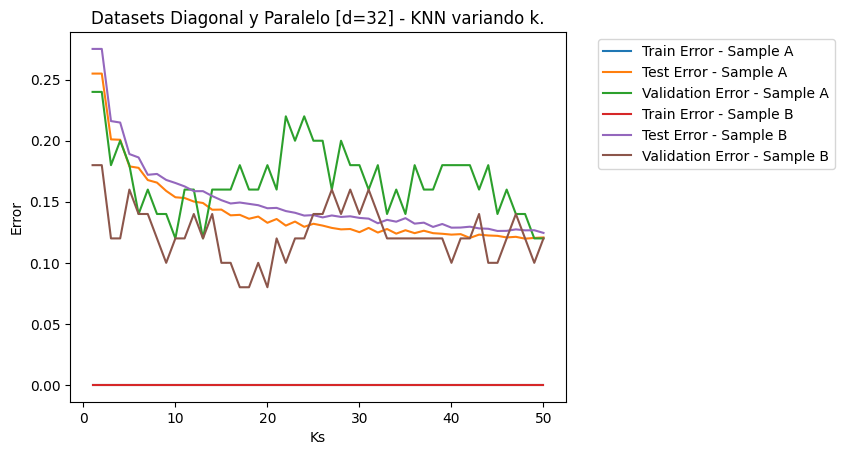

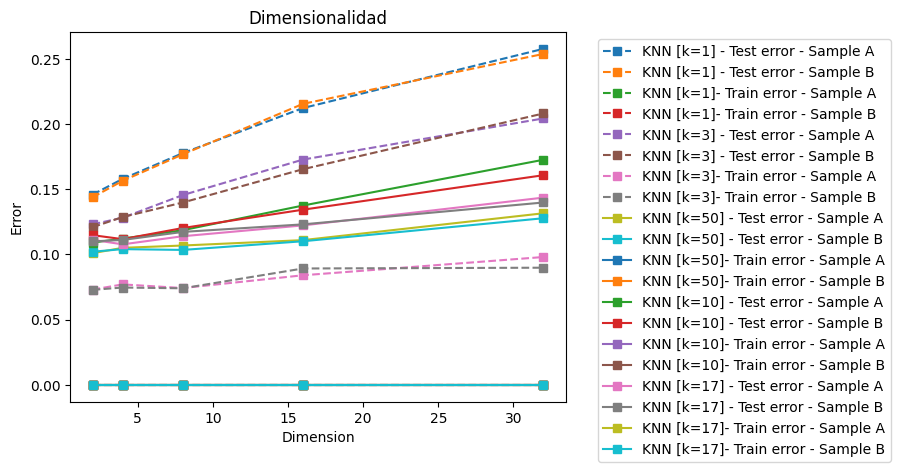

In [52]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def plot_distancias_pesadas(ks, train_errors_a, val_errors_a, test_errors_a, train_errors_b, val_errors_b, test_errors_b):
  plt.plot(ks, train_errors_a, label="Train Error - Sample A")
  plt.plot(ks, test_errors_a, label="Test Error - Sample A")
  plt.plot(ks, val_errors_a, label="Validation Error - Sample A")
  plt.plot(ks, train_errors_b, label="Train Error - Sample B")
  plt.plot(ks, test_errors_b, label="Test Error - Sample B")
  plt.plot(ks, val_errors_b, label="Validation Error - Sample B")
  plt.xlabel("Ks")
  plt.ylabel("Error")
  plt.title("Datasets Diagonal y Paralelo [d=32] - KNN variando k.")
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
  plt.show()


def distancias_pesadas():
  C = 0.78
  n = 250
  n_test = 10000
  d = 32
  data_columns = [f'Dim{i+1}' for i in range(d)]
  target_columns = "Class"

  df_generator = MultidimensionalGaussianDistribution()
  test_df_a = df_generator.generate_sample_a(n=n_test, dimension=d, C=C)
  X_test_a, y_test_a = test_df_a[data_columns], test_df_a[target_columns]
  test_df_b = df_generator.generate_sample_b(n=n_test, dimension=d, C=C)
  X_test_b, y_test_b = test_df_b[data_columns], test_df_b[target_columns]
  df_a = df_generator.generate_sample_a(n=n, dimension=d, C=C)
  X_a, y_a = df_a[data_columns], df_a[target_columns]
  df_b = df_generator.generate_sample_b(n=n, dimension=d, C=C)
  X_b, y_b = df_b[data_columns], df_b[target_columns]

  X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(X_a, y_a, random_state=0, train_size=0.8)
  X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_b, y_b, random_state=0, train_size=0.8)

  ks = range(1,51)
  best_knn_a, best_k_a, train_errors_a, val_errors_a, test_errors_a = train_knn_classif(ks, X_train_a, y_train_a, X_val_a, y_val_a, X_test_a, y_test_a, 'distance')
  best_knn_b, best_k_b, train_errors_b, val_errors_b, test_errors_b = train_knn_classif(ks, X_train_b, y_train_b, X_val_b, y_val_b, X_test_b, y_test_b, 'distance')

  print(f"Dataset Diagonal [d=32]\n - mejor modelo: KNN k={best_k_a}\n - error test con k={best_k_a}: {test_errors_a[best_k_a-1]}\n - error test con k=50: {test_errors_a[50-1]}")
  print(f"Dataset Paralelo [d=32]\n - mejor modelo: KNN k={best_k_b}\n - error test con k={best_k_b}: {test_errors_b[best_k_b-1]}\n - error test con k=50: {test_errors_b[50-1]}")
  plot_distancias_pesadas(ks, train_errors_a, val_errors_a, test_errors_a, train_errors_b, val_errors_b, test_errors_b)

  dimensionalidad_knn(1, 'uniform')
  dimensionalidad_knn(3, 'uniform')
  dimensionalidad_knn(50, 'distance', linestyle='solid')
  dimensionalidad_knn(best_k_a, 'distance', linestyle='solid')
  dimensionalidad_knn(best_k_b, 'distance', linestyle='solid')
  plt.xlabel("Dimension")
  plt.ylabel("Error")
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
  plt.title("Dimensionalidad")
  plt.show()

distancias_pesadas()

### Comentarios

Los modelos KNN con pesado inverso a la distancia resultaron mejores en el problema de la dimensionalidad que los modelos KNN con pesos uniformes, en particular, el mejor fue con `k=50`. Igualmente, todos los modelos excepto aquel con pesado uniforme y `k=3` tuvieron sobreajuste total (error de entrenamiento nulo) independientemente de la dimensión.

Comparando los modelos con pesado inverso a la distancia sobre el dataset de dimensión 32, aquel con `k=50` también resulto mejor que los óptimos. Los erorres de entramiento son nulos (se sobreajustan independientemente del k), los errores de test decrecen según aumenta el k y los errores de validación son muy variantes. Una curiosidad que note, es que los resultados de este grafico en particular varian _mucho_ entre ejecuciones, esto se lo atribuyo a que el dataset es generado aleatoreamente.

## Ejercicio D

Se arma una función para hacer regresión con un modelo KNN con pesos uniformes y con pesos inversos a la distancia. Se aplican ambos modelos de regresión a los problemas de Sunspots e Ikeda, variando el k entre 1 y 20. Se grafican las curvas de errores de entrenamiento, test y validación, y se imprimen los errores de test y entrenamiento para el modelo óptimo, para poder compararlo con los resultados obtenidos con Redes Neuronales.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from copy import deepcopy
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


def train_knn_regression(ks, X_train, y_train, X_val, y_val, X_test, y_test, weights):
  train_errors = []
  val_errors = []
  test_errors = []
  best_val_error = 1

  for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k, weights=weights)

    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    y_test_pred = knn.predict(X_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

    if val_error < best_val_error:
      best_val_error = val_error
      best_k = k
      best_knn = deepcopy(knn)

  return best_knn, best_k, train_errors, val_errors, test_errors


def sunspots():
  ssp_data_url = 'https://github.com/inescipullo/IAA/raw/main/TP2/Datasets/ssp.data'
  ssp_test_url = 'https://github.com/inescipullo/IAA/raw/main/TP2/Datasets/ssp.test'

  columns = [f'Col{i}' for i in range(13)]
  data_columns = columns[:-1]
  target_columns = columns[-1]

  ssp_data_df = pd.read_csv(ssp_data_url, header=None, names=columns)
  ssp_test_df = pd.read_csv(ssp_test_url, header=None, names=columns)
  X_test, y_test = ssp_test_df[data_columns], ssp_test_df[target_columns]
  X, y = ssp_data_df[data_columns], ssp_data_df[target_columns]
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.8)

  ks = list(range(1,21))
  u_best_knn, u_best_k, u_train_errors, u_val_errors, u_test_errors = train_knn_regression(ks, X_train, y_train, X_val, y_val, X_test, y_test, 'uniform')
  i_best_knn, i_best_k, i_train_errors, i_val_errors, i_test_errors = train_knn_regression(ks, X_train, y_train, X_val, y_val, X_test, y_test, 'distance')

  table = []
  table.append([f"KKN Uniform [k={u_best_k}]", u_train_errors[u_best_k-1], u_test_errors[u_best_k-1]])
  table.append([f"KKN Inverse [k={i_best_k}]", i_train_errors[i_best_k-1], i_test_errors[i_best_k-1]])
  table.append(["ANN", 0.004051, 0.004755])
  table_df = pd.DataFrame(table, columns=["Modelo", "Train Error", "Test Error"])
  display(table_df)

  plot_errors(ks, u_train_errors, u_val_errors, u_test_errors, f"Sunspots - KNN Uniform [k={u_best_k}]")
  plot_errors(ks, i_train_errors, i_val_errors, i_test_errors, f"Sunspots - KNN Inverse [k={i_best_k}]")


def ikeda():
  ikeda_data_url = 'https://github.com/inescipullo/IAA/raw/main/TP2/Datasets/ikeda.data'
  ikeda_test_url = 'https://github.com/inescipullo/IAA/raw/main/TP2/Datasets/ikeda.test'

  columns = ['Col1','Col2','Col3','Col4','Col5','Col6']
  data_columns = columns[:-1]
  target_columns = columns[-1]

  ikeda_data_df = pd.read_csv(ikeda_data_url, header=None, names=columns, delim_whitespace=True)
  ikeda_test_df = pd.read_csv(ikeda_test_url, header=None, names=columns, delim_whitespace=True)
  X_test, y_test = ikeda_test_df[data_columns], ikeda_test_df[target_columns]
  X, y = ikeda_data_df[data_columns], ikeda_data_df[target_columns]
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.8)

  ks = list(range(1,21))
  u_best_knn, u_best_k, u_train_errors, u_val_errors, u_test_errors = train_knn_regression(ks, X_train, y_train, X_val, y_val, X_test, y_test, 'uniform')
  i_best_knn, i_best_k, i_train_errors, i_val_errors, i_test_errors = train_knn_regression(ks, X_train, y_train, X_val, y_val, X_test, y_test, 'distance')

  table = []
  table.append([f"KKN Uniform [k={u_best_k}]", u_train_errors[u_best_k-1], u_test_errors[u_best_k-1]])
  table.append([f"KKN Inverse [k={i_best_k}]", i_train_errors[i_best_k-1], i_test_errors[i_best_k-1]])
  table.append(["ANN", 0.054683, 0.075455])
  table_df = pd.DataFrame(table, columns=["Modelo", "Train Error", "Test Error"])
  display(table_df)

  plot_errors(ks, u_train_errors, u_val_errors, u_test_errors, f"Ikeda - KNN Uniform [k={u_best_k}]")
  plot_errors(ks, i_train_errors, i_val_errors, i_test_errors, f"Ikeda - KNN Inverse [k={i_best_k}]")


sunspots()
ikeda()

### Resultados SSP

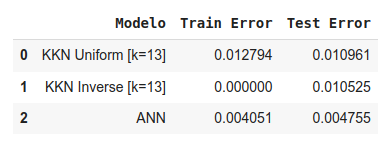

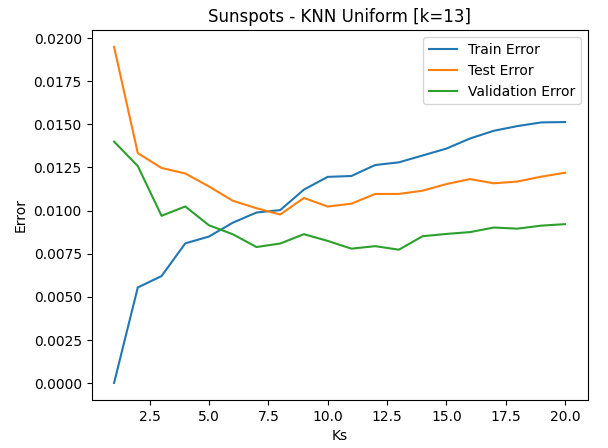

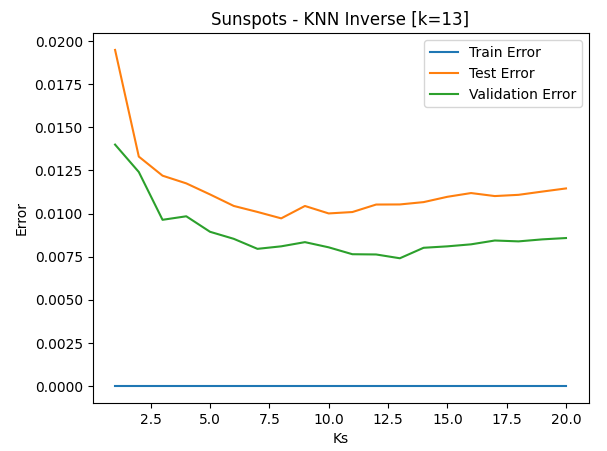

Los resultados obtenidos con redes neuronales para el problema de Sunspots son ampliamnete superiores a los obtenidos con ambos KNN, siendo el error sobre el conjunto de test de menos de la mitad.

Comparando la regresión con pesos uniformes y la regresión con pesos inversos a la distancia, se observa que las curvas de error de validación y test son altamente similares. El error de entrenamiento es nulo con pesado inverso a la distancia, por lo que concluyo que el modelo se sobreajusta, independientemente del valor de k. En el modelo con pesado uniforme puede haber sobreajuste pero solo para valores de k pequeños.


### Resultados Ikeda

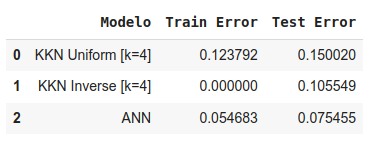

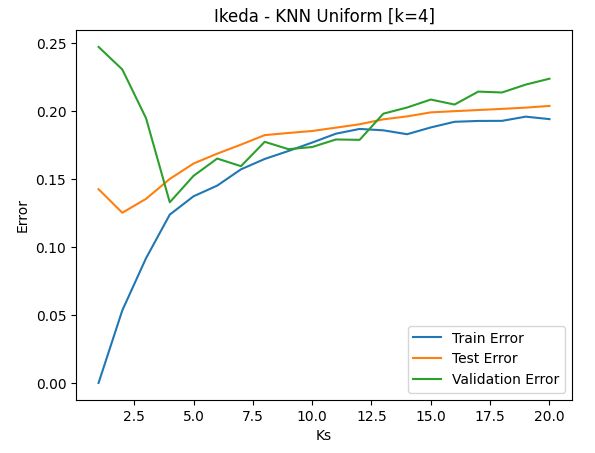

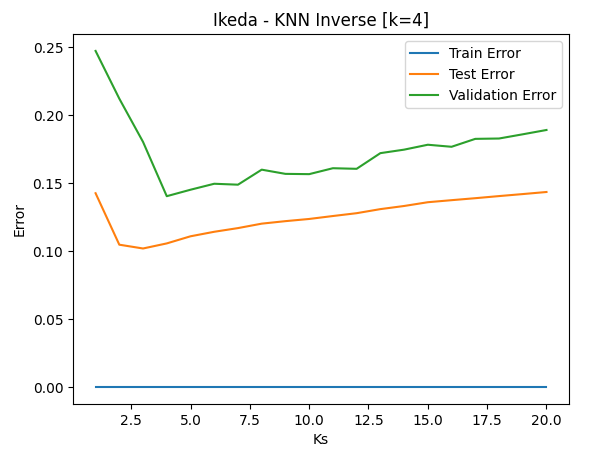

En este caso, los resultados obtenidos con redes neuronales para el problema de Ikeda también son superiores a los obtenidos con ambos KNN, pero con menor diferencia.

Devuelta, comparando la regresión con pesos uniformes y la regresión con pesos inversos a la distancia, la situación es un poco distinta. Para el problema de Ikeda, obtuvo mejores resultados el modelo KNN con pesado inverso a la distancia, pero devuelta, el error de entrenamiento es nulo, por lo que el modelo se sobreajusta independientemente del valor de k. En el modelo con pesado uniforme puede haber sobreajuste pero solo para valores de k pequeños y los errores de test y validación son más o menos un 50% más altos que con pesado inverso a las distancia.

Como comentario general, me pareció curioso que en ambos problemas el valor de `k` que resultó óptimo es el mismo para ambos modelos de regresión.

## Ejercicio E

Se define una función que dados datos de un dataset y su clasificación, devuelve el valor de r (radio) óptimo para utilizar en un modelo de clasificación Radius Neighbors.

Luego se aplica el modelo de Radius Neighbors con el r óptimo al problema de dimensionalidad, y se grafican las curvas de error de entrenamiento y test para compararlas con lo obtenido en el Ejercicio C.


In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
from copy import deepcopy
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.spatial.distance import pdist
import numpy as np


def optimize_r_for_rnn(X, y):
  """El valor de r se busca entre la minima distancia entre dos puntos del dataset,
  que siempre va a ser 0 porque tambien se computan las dstancias de los puntos
  consigo mismos, y la maxima distancia entre dos puntos del dataset."""

  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.8)

  distances = pdist(X_train, metric='euclidean')
  min_distance = np.min(distances)
  max_distance = np.max(distances)
  rs = np.linspace(min_distance, max_distance, num=20)

  best_val_error = 1

  for r in rs:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=0)

    rnn.fit(X_train, y_train)

    y_val_pred = rnn.predict(X_val)
    val_error = 1 - accuracy_score(y_val, y_val_pred)

    if val_error < best_val_error:
      best_val_error = val_error
      best_r = r

  return best_r


def plot_dimensionalidad_rnn(errors):
  x = [2,4,8,16,32]
  y_test_a = []
  y_test_b = []
  y_train_a = []
  y_train_b = []
  for d in x:
    y_test_a.append(np.mean(errors[f"{d}"]["a_test"]))
    y_test_b.append(np.mean(errors[f"{d}"]["b_test"]))
    y_train_a.append(np.mean(errors[f"{d}"]["a_train"]))
    y_train_b.append(np.mean(errors[f"{d}"]["b_train"]))

  plt.plot(x, y_test_a, marker='s', label=f"Test error - Sample A")
  plt.plot(x, y_test_b, marker='s', label=f"Test error - Sample B")
  plt.plot(x, y_train_a, marker='s', label=f"Train error - Sample A")
  plt.plot(x, y_train_b, marker='s', label=f"Train error - Sample B")
  plt.xlabel("Dimension")
  plt.ylabel("Error")
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
  plt.title("Dimensionalidad Radius Neighbors")
  plt.show()

def dimensionalidad_rnn():
  C = 0.78
  n = 250
  n_test = 10000
  dimensions = [2,4,8,16,32]
  df_generator = MultidimensionalGaussianDistribution()
  errors = {}
  for d in dimensions:
    errors[f"{d}"] = {}
    errors[f"{d}"] = {"a_test": [], "b_test": [], "a_train": [], "b_train": []}
    data_columns = [f'Dim{i+1}' for i in range(d)]
    target_columns = "Class"

    test_df_a = df_generator.generate_sample_a(n=n_test, dimension=d, C=C)
    X_test_a, y_test_a = test_df_a[data_columns], test_df_a[target_columns]
    test_df_b = df_generator.generate_sample_b(n=n_test, dimension=d, C=C)
    X_test_b, y_test_b = test_df_b[data_columns], test_df_b[target_columns]

    for _ in range(20):
      df_a = df_generator.generate_sample_a(n=n, dimension=d, C=C)
      X_train_a, y_train_a = df_a[data_columns], df_a[target_columns]
      df_b = df_generator.generate_sample_b(n=n, dimension=d, C=C)
      X_train_b, y_train_b = df_b[data_columns], df_b[target_columns]

      best_r_a = optimize_r_for_rnn(X_train_a, y_train_a)
      best_r_b = optimize_r_for_rnn(X_train_b, y_train_b)

      rnn_a = RadiusNeighborsClassifier(radius=best_r_a, outlier_label=0)
      rnn_b = RadiusNeighborsClassifier(radius=best_r_b, outlier_label=0)

      rnn_a.fit(X_train_a, y_train_a)
      rnn_b.fit(X_train_b, y_train_b)

      y_test_a_pred = rnn_a.predict(X_test_a)
      y_test_b_pred = rnn_b.predict(X_test_b)
      y_train_a_pred = rnn_a.predict(X_train_a)
      y_train_b_pred = rnn_b.predict(X_train_b)

      test_error_a = 1 - accuracy_score(y_test_a, y_test_a_pred)
      test_error_b = 1 - accuracy_score(y_test_b, y_test_b_pred)
      train_error_a = 1 - accuracy_score(y_train_a, y_train_a_pred)
      train_error_b = 1 - accuracy_score(y_train_b, y_train_b_pred)
      errors[f"{d}"]["a_test"].append(test_error_a)
      errors[f"{d}"]["b_test"].append(test_error_b)
      errors[f"{d}"]["a_train"].append(train_error_a)
      errors[f"{d}"]["b_train"].append(train_error_b)

  plot_dimensionalidad_rnn(errors)


dimensionalidad_rnn()

### Resultados

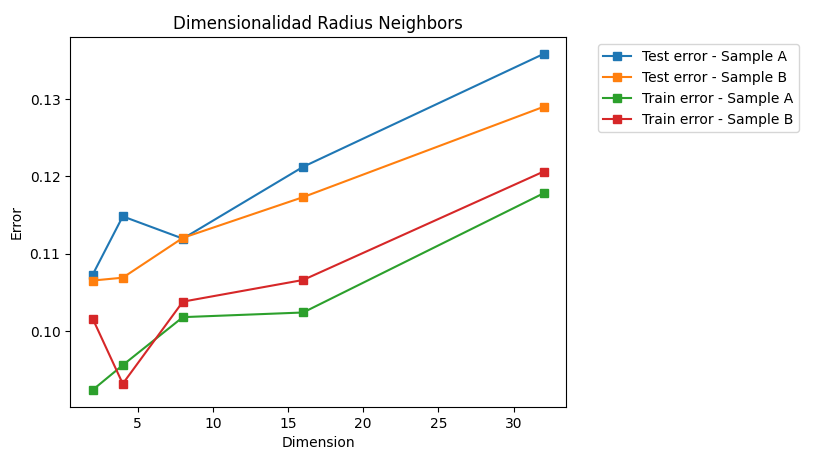

Comparandolo con los resultados obtenidos para el problema de dimensionalidad con modelos KNN, este modelo de Radius Neighbors arroja mejores resultados que los modelos KNN con pesos uniformes y resultados similares a los modelos KNN con pesado inverso a la distancia. Más allá de eso, lo que me parece que más vale la pena destacar, es que estos modelos no sobreajustaron, cosa que venía ocurriendo con practicamente todos los modelos KNN.